## Import librerie ed oggetti

* pandas, per la manipolazione dei dati csv.
* seaborn (https://www.kaggle.com/learn/data-visualization) e matplotlib, per i grafici
* da sklearn:
    * LabelEncoder, per gestire variabili categoriali
    * RandomForestClassifier (da Kaggle)
    * LogisticRegression
    * MLPClassifier
    * GaussianNB
    * SVM

In [1]:
!sudo apt update && sudo apt install -y graphviz

/bin/bash: sudo: command not found


In [2]:
!pip3 install graphviz
!pip3 install mglearn
!pip3 install seaborn
!pip3 install scikit-learn=='0.24.1'

### Import librerie necessarie

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import classification_report

### Importo i file di training e di test

In [4]:
placement_train = pd.read_csv('train.csv', error_bad_lines=False,dtype=str)
placement_test = pd.read_csv('test.csv', error_bad_lines=False,dtype=str)

### Preprocessing dei dati

Prepariamo i dati:
* per prima cosa visualizzo i dati di training
* rimuovo i duplicati
* rimuovo i valori nulli
* Sostituisco i valori NaN
* Effettuo l'encoding delle stringhe in interi
* Cerco le feature più significative
* Elimino le feature che hanno meno influenza sul risultato

In [5]:
#visualizzo i dati di training 
placement_train

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Placed,M,65.0,Central,71.5,Others,Commerce,62.8,Comm&Mgmt,Yes,57.0,Mkt&Fin,56.6,265000.0
1,Not Placed,M,62.0,Central,60.33,Others,Science,64.21,Sci&Tech,No,63.0,Mkt&HR,60.02,NaN
2,Not Placed,M,54.0,Central,82.0,Others,Commerce,63.0,Sci&Tech,No,50.0,Mkt&Fin,59.47,NaN
3,Placed,M,63.0,Others,71.4,Others,Commerce,61.4,Comm&Mgmt,No,68.0,Mkt&Fin,66.88,240000.0
4,Not Placed,M,62.0,Central,47.0,Central,Commerce,50.0,Comm&Mgmt,No,76.0,Mkt&HR,54.96,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Not Placed,M,66.0,Central,64.0,Central,Science,60.0,Comm&Mgmt,No,60.0,Mkt&HR,61.9,NaN
133,Not Placed,M,59.96,Others,42.16,Others,Science,61.26,Sci&Tech,No,54.48,Mkt&HR,65.48,NaN
134,Placed,F,73.0,Central,97.0,Others,Commerce,79.0,Comm&Mgmt,Yes,89.0,Mkt&Fin,70.81,650000.0
135,Not Placed,F,55.0,Central,67.0,Central,Commerce,64.0,Comm&Mgmt,No,60.0,Mkt&Fin,67.28,NaN


Elenco delle informazioni contenute nel dataset: 
Il dataset contiene le caratteristiche (feature) di ~170 studenti. La più importante è 'status', che assume solo valori 'Placed'/'Not Placed' ossia se lo studente abbia trovato collocazione nel suo primo anno.

* status: Collocato sì o no.
* gender: Maschio o Femmina
* ssc_p: Punteggio di scuola media
* ssc_b: Board of Education per le medie (NdA: credo si tratti di commissione esterna/interna)
* hsc_p: Punteggio di diploma
* hsc_b: Board of Education per il diploma (NdA: credo si tratti di commissione esterna/interna)
* hsc_s: Tipologia di liceo
* degree_p: Punteggio di laurea
* degree_t: Settore disciplinare della laurea
* workex: Esperienza lavorativa
* etest_p: Punteggio test di collocabilità (condotto dal college)
* specialisation: Specializzazione post laurea (MBA)
* mba_p: Punteggio MBA
* salary: Stipendio offerto dalla compagnia ai candidati.

In [6]:
#informazioni sui dati 
placement_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   status          137 non-null    object
 1   gender          137 non-null    object
 2   ssc_p           137 non-null    object
 3   ssc_b           137 non-null    object
 4   hsc_p           137 non-null    object
 5   hsc_b           137 non-null    object
 6   hsc_s           137 non-null    object
 7   degree_p        137 non-null    object
 8   degree_t        137 non-null    object
 9   workex          137 non-null    object
 10  etest_p         137 non-null    object
 11  specialisation  137 non-null    object
 12  mba_p           137 non-null    object
 13  salary          92 non-null     object
dtypes: object(14)
memory usage: 15.1+ KB


In [7]:
placement_train.describe()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
count,137,137,137,137,137,137,137,137,137,137,137,137,137,92
unique,2,2,78,2,76,2,3,68,3,2,78,2,133,35
top,Placed,M,62.0,Central,63.0,Others,Commerce,65.0,Comm&Mgmt,No,75.0,Mkt&Fin,59.47,300000.0
freq,92,92,10,76,11,86,69,13,91,90,6,77,2,16


In [8]:
#controllo la presenza di valori nulli
placement_train.isnull().sum()

status             0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            45
dtype: int64

Notiamo che il campo 'salary' ha molti campi NaN. Li sostituiamo con 0.

In [9]:
placement_train['salary'] = placement_train['salary'].fillna(0)
placement_test['salary'] = placement_test['salary'].fillna(0)
placement_train.isnull().sum()

status            0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64

In [10]:
#trasformo in float e int i campi per facilitare i calcoli 
placement_train['ssc_p'] = placement_train.ssc_p.astype(float)
placement_train['hsc_p'] = placement_train.hsc_p.astype(float)
placement_train['degree_p'] = placement_train.degree_p.astype(float)
placement_train['etest_p'] = placement_train.etest_p.astype(float)
placement_train['mba_p'] = placement_train.mba_p.astype(float)
placement_train['salary'] = placement_train.salary.astype(float)

placement_test['ssc_p'] = placement_test.ssc_p.astype(float)
placement_test['hsc_p'] = placement_test.hsc_p.astype(float)
placement_test['degree_p'] = placement_test.degree_p.astype(float)
placement_test['etest_p'] = placement_test.etest_p.astype(float)
placement_test['mba_p'] = placement_test.mba_p.astype(float)
placement_test['salary'] = placement_test.salary.astype(float)

In [11]:
#controllo che non ci siano duplicati
placement_train.drop_duplicates(inplace=True)
placement_test.drop_duplicates(inplace=True)

In [12]:
placement_train

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Placed,M,65.00,Central,71.50,Others,Commerce,62.80,Comm&Mgmt,Yes,57.00,Mkt&Fin,56.60,265000.0
1,Not Placed,M,62.00,Central,60.33,Others,Science,64.21,Sci&Tech,No,63.00,Mkt&HR,60.02,0.0
2,Not Placed,M,54.00,Central,82.00,Others,Commerce,63.00,Sci&Tech,No,50.00,Mkt&Fin,59.47,0.0
3,Placed,M,63.00,Others,71.40,Others,Commerce,61.40,Comm&Mgmt,No,68.00,Mkt&Fin,66.88,240000.0
4,Not Placed,M,62.00,Central,47.00,Central,Commerce,50.00,Comm&Mgmt,No,76.00,Mkt&HR,54.96,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Not Placed,M,66.00,Central,64.00,Central,Science,60.00,Comm&Mgmt,No,60.00,Mkt&HR,61.90,0.0
133,Not Placed,M,59.96,Others,42.16,Others,Science,61.26,Sci&Tech,No,54.48,Mkt&HR,65.48,0.0
134,Placed,F,73.00,Central,97.00,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,650000.0
135,Not Placed,F,55.00,Central,67.00,Central,Commerce,64.00,Comm&Mgmt,No,60.00,Mkt&Fin,67.28,0.0


In [13]:
n = placement_train[placement_train.status=='Not Placed'].shape[0]

print(n*100/137)
#Circa il 29% degli studenti non ha trovato collocazione nel suo primo anno.

32.846715328467155


In [14]:
#Effettua l'encoding delle stringhe in interi
label_encoder = LabelEncoder()
placement_train_encoded = placement_train.apply(label_encoder.fit_transform)
placement_test_encoded = placement_test.apply(label_encoder.fit_transform)

In [15]:
#visualizza la corrrelazione tra le features
print(placement_train_encoded.corr())

                  status    gender     ssc_p     ssc_b     hsc_p     hsc_b  \
status          1.000000 -0.025845  0.637170  0.032413  0.504999  0.007979   
gender         -0.025845  1.000000 -0.146175 -0.030130 -0.104623  0.040129   
ssc_p           0.637170 -0.146175  1.000000  0.136668  0.561925  0.050364   
ssc_b           0.032413 -0.030130  0.136668  1.000000 -0.105292  0.598767   
hsc_p           0.504999 -0.104623  0.561925 -0.105292  1.000000  0.012816   
hsc_b           0.007979  0.040129  0.050364  0.598767  0.012816  1.000000   
hsc_s           0.002102  0.054473  0.169990  0.070441 -0.186348  0.161740   
degree_p        0.518595 -0.270562  0.518456  0.091304  0.426726  0.138125   
degree_t        0.073017  0.073017  0.192716  0.076470 -0.021896  0.033642   
workex          0.276241  0.079813  0.175905 -0.059616  0.147711  0.079400   
etest_p         0.185741  0.103948  0.322561 -0.005411  0.198352  0.053195   
specialisation -0.322402 -0.040472 -0.261988 -0.080380 -0.332401

POSITIVO: 
* ssc_p: 0.621156
* ssc_b: 0.022078
* hsc_p: 0.494871
* hsc_s: 0.060665
* degree_p: 0.501935
* workex: 0.166642
* etest_p: 0.134574
* mba_p: 0.150336
* salary: 0.736071

NEGATIVO: 
* gender: - 0.019960
* hsc_b: - 0.006037
* degree_t: - 0.101814
* specialisation: - 0.274454

Cominciamo studiando i grafici di tutte le variabili presenti.

<AxesSubplot:xlabel='status', ylabel='salary'>

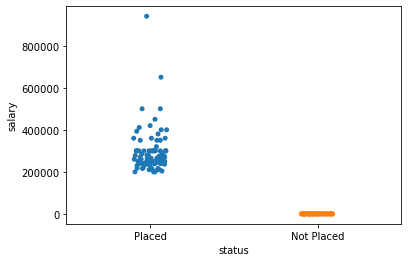

In [16]:
#Cominciamo da salary, lo stipendio offerto dalla compagnia ai candidati.

sns.stripplot(x = placement_train['status'], y = placement_train['salary'])

#MOLTO importante, not placed = salario 0!! 

<AxesSubplot:xlabel='status', ylabel='ssc_p'>

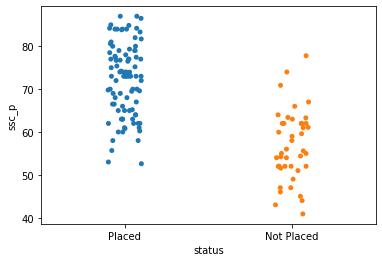

In [17]:
# Ora studiamo ssc_p, il punteggio della scuola media.

sns.stripplot(x = placement_train['status'], y = placement_train['ssc_p'])

# Gli studenti con ssc_p sopra 80 hanno tutti status = placed
# Gli studenti con ssc_p sotto 50 hanno tutti status = not placed 
# Gli altri sono una media tra i due.

<AxesSubplot:xlabel='status', ylabel='hsc_p'>

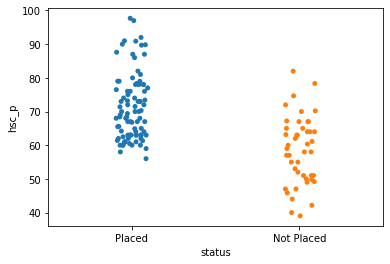

In [18]:
#Studiamo hsc_p, il punteggio di diploma. 

sns.stripplot(x = placement_train['status'], y = placement_train['hsc_p'])

#Anche da questo grafico vediamo che gli studenti con valutazioni più alte hanno molta probabilità di avere placed.
#Sotto 50 not placed, sopra 80 placed.

<AxesSubplot:xlabel='status', ylabel='degree_p'>

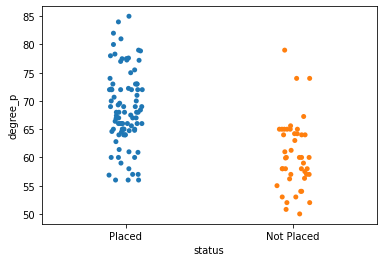

In [19]:
#studiamo degree_p, il punteggio di laurea. 

sns.stripplot(x = placement_train['status'], y = placement_train['degree_p'])

#Voti più alti, placed, come prima
# Sotto 55 not placed, sopra 80 placed, per il resto più o meno una media.

<AxesSubplot:xlabel='status', ylabel='mba_p'>

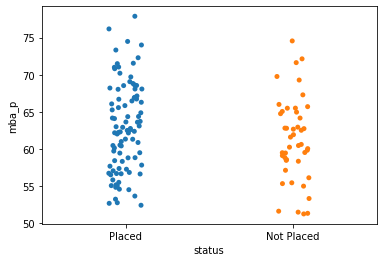

In [20]:
#Studiamo mba_p, il punteggio MBA.

sns.stripplot(x = placement_train['status'], y = placement_train['mba_p'])

#In questo caso la differenza non è granché, consideriamo questa variabile per l'eliminazione.

[['Commerce', 68.1159420289855], ['Science', 66.66666666666667], ['Arts', 62.5]]


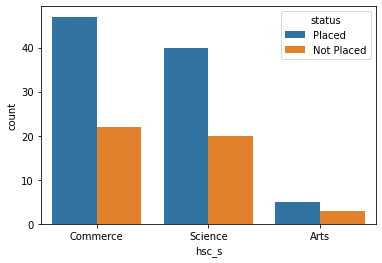

In [21]:
#Studiamo hsc_s, la tipologia di liceo.

sns.countplot(x='hsc_s', hue = 'status',data = placement_train)

tipi = placement_train['hsc_s'].unique()
n_per_tipo = []
for tipo in tipi: 
    n_per_tipo.append([tipo, placement_train.hsc_s.eq(tipo).sum(), placement_train[(placement_train.hsc_s == tipo) & (placement_train.status== 'Placed')].shape[0]])

result=[]
for e in n_per_tipo: 
    result.append([e[0], (e[2]*100/e[1])])

def myFunc2(e):
    return e[1]

result.sort(reverse=True, key=myFunc2)
print(result)

#Il 71% dei campi con valore Commerce e il 70% con valore Science hanno il valore Placed in status.
#Commerce sembra influire particolarmente.

<AxesSubplot:xlabel='status', ylabel='etest_p'>

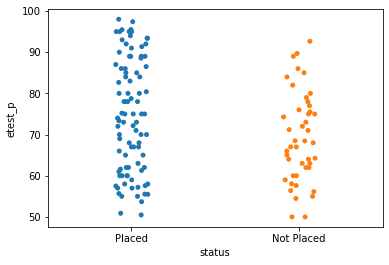

In [22]:
#Studiamo etest_p, il punteggio al test di collocabilità condotto dal college. 

sns.stripplot(x = placement_train['status'], y = placement_train['etest_p'])

#La differenza non è granché, consideriamo questa variabile per l'eliminazione.

<AxesSubplot:xlabel='ssc_b', ylabel='count'>

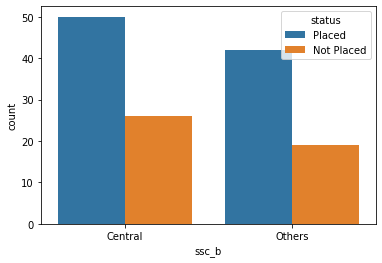

In [23]:
#Studio ssc_b , Board of Education per le medie. 

sns.countplot(x='ssc_b', hue = 'status',data = placement_train)

#Non particolarmente rilevante, consideriamo questa variabile per l'eliminazione.

<AxesSubplot:xlabel='hsc_b', ylabel='count'>

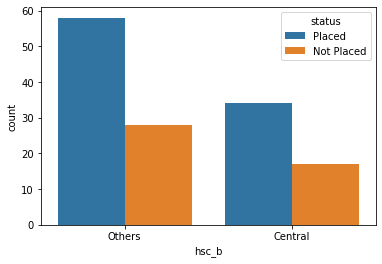

In [24]:
#Studiamo hsc_b, Board of education per il diploma.

sns.countplot(x='hsc_b', hue = 'status',data = placement_train)

# hsc_b = others sembra essere rilevante ai fini dell'assunzione

[['Sci&Tech', 75.0], ['Comm&Mgmt', 65.93406593406593], ['Others', 33.333333333333336]]


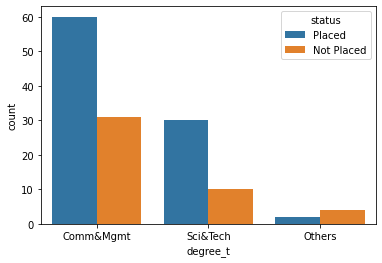

In [25]:
#Studiamo degree_t, il settore disciplinare della laurea.

sns.countplot(x='degree_t', hue = 'status',data = placement_train)

tipi = placement_train['degree_t'].unique()
n_per_tipo = []
for tipo in tipi: 
    n_per_tipo.append([tipo, placement_train.degree_t.eq(tipo).sum(), placement_train[(placement_train.degree_t == tipo) & (placement_train.status== 'Placed')].shape[0]])

result=[]
for e in n_per_tipo: 
    result.append([e[0], (e[2]*100/e[1])])

def myFunc2(e):
    return e[1]

result.sort(reverse=True, key=myFunc2)
print(result)

#Il 78% dei campi con valore Sci&Tech e il 70% con valore Comm&Mgmt hanno il valore Placed in status.
#Comm&Mgmt sembra influire molto.

[['Yes', 85.1063829787234], ['No', 57.77777777777778]]


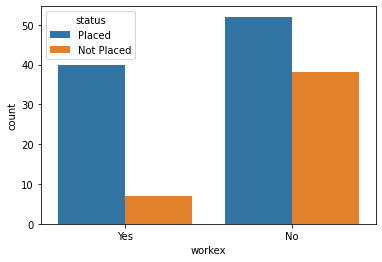

In [26]:
#Studiamo workex, l'esperienza lavorativa.

sns.countplot(x='workex', hue = 'status',data = placement_train)

tipi = placement_train['workex'].unique()
n_per_tipo = []
for tipo in tipi: 
    n_per_tipo.append([tipo, placement_train.workex.eq(tipo).sum(), placement_train[(placement_train.workex == tipo) & (placement_train.status== 'Placed')].shape[0]])

result=[]
for e in n_per_tipo: 
    result.append([e[0], (e[2]*100/e[1])])

def myFunc2(e):
    return e[1]

result.sort(reverse=True, key=myFunc2)
print(result)

#Importantissimo! Quasi tutti quelli con esperienza lavorativa vengono assunti! 

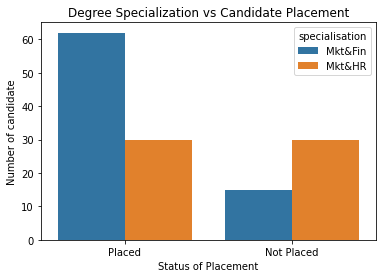

In [27]:
#Studiamo specialization, la specializzazione post laurea (MBA) 

sns.countplot(x="status", data=placement_train, hue='specialisation')
plt.title("Degree Specialization vs Candidate Placement")
plt.xlabel("Status of Placement")
plt.ylabel("Number of candidate")
plt.show()

#Moltissimi con la specializzazione Mkt&Fin sono placed! 

<AxesSubplot:xlabel='gender', ylabel='count'>

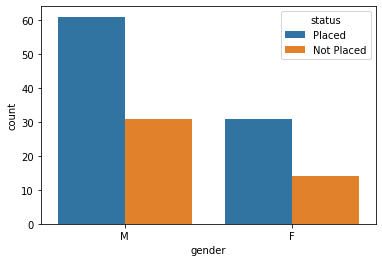

In [28]:
#Infine studiamo il genere. 

sns.countplot(x='gender', hue = 'status',data = placement_train)

#Molti maschi vengono assunti più delle donne.

<AxesSubplot:xlabel='gender,status'>

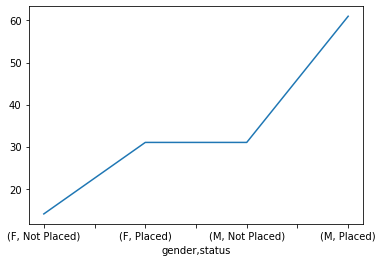

In [29]:
placement_train.groupby(['gender','status'])['status'].count().plot.line()

In [30]:
#Notiamo che le feature che hanno minore impatto sul valore di status sono mba_p, 
#etest_p, ssc_b. Le elimino.

placement_train_encoded.drop(['mba_p','etest_p','ssc_b'], axis = 1, inplace = True)
placement_train.drop(['mba_p','etest_p','ssc_b'], axis = 1, inplace = True)

placement_test_encoded.drop(['mba_p','etest_p','ssc_b'], axis = 1, inplace = True)
placement_test.drop(['mba_p','etest_p','ssc_b'], axis = 1, inplace = True)

### Split dei dati

In [31]:
#splitta i dati di train per avere feature (X_train) e target (y_train)
y_train = placement_train_encoded.pop('status')
X_train = placement_train_encoded

#splitta i dati di test per avere feature (X_test) e target (y_train)
y_test = placement_test_encoded.pop('status')
X_test = placement_test_encoded

### Attenzione! 
E' possibile che utilizzando il classificatore gaussiano Naive Bayes e il Random Forest Classifier si sia verificato overfitting, poiché danno accuratezza uguale a 1. 
In ogni caso i dati sono pochi (137 righe), è possibile che ci sia qualcosa che non va.

Credo però che questi risultati siano legati alla fortissima correlazione che c'è tra la variabile salary e la variabile status. Se status = not placed, la variabile salary negli esempi che ho a disposizione sarà sempre uguale a 0, mentre il valore di salary è diverso da 0 quando status = not placed. 

In [32]:
#effettuo la classificazione con logistic regression 
log_reg = LogisticRegression(max_iter=300,n_jobs=-1, penalty='l2', random_state=None)
log_reg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression: {:.3f}".format(log_reg.score(X_test, y_test)))
print(classification_report(y_test, log_reg.predict(X_test.loc[:, X_test.columns != 'placed'])))

Test set accuracy with Logistic Regression: 0.914
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.88      0.94        25

    accuracy                           0.91        35
   macro avg       0.88      0.94      0.90        35
weighted avg       0.93      0.91      0.92        35



In [33]:
# effettuo la classificazione con random forest classifier 
rand_for = RandomForestClassifier(max_depth=8, n_estimators=50,random_state=0)
risultato = rand_for.fit(X_train, y_train)
print("Test set accuracy with Random Forest Classifier: {:.3f}".format(risultato.score(X_test, y_test)))
print(classification_report(y_test, rand_for.predict(X_test.loc[:, X_test.columns != 'placed'])))

Test set accuracy with Random Forest Classifier: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        25

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [34]:
#Effettuo la classificazione con MLPClassifier.
mlp= MLPClassifier(random_state=1, max_iter=1000, activation='tanh', alpha=1e-5)
mlp.fit(X_train, y_train)
print("Test set accuracy with MLP: {:.3f}".format(mlp.score(X_test, y_test)))
print(classification_report(y_test, mlp.predict(X_test.loc[:, X_test.columns != 'placed'])))

Test set accuracy with MLP: 0.943
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.92      0.96        25

    accuracy                           0.94        35
   macro avg       0.92      0.96      0.93        35
weighted avg       0.95      0.94      0.94        35



In [35]:
# Effettuo la classificazione con Naive Bayes (Dal corso di ML)
nbclassifier = GaussianNB()
nbclassifier.fit(X_train, y_train)
print("Test set accuracy with GaussianNB: {:.3f}".format(nbclassifier.score(X_test, y_test)))
print(classification_report(y_test, nbclassifier.predict(X_test.loc[:, X_test.columns != 'placed'])))

Test set accuracy with GaussianNB: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        25

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [36]:
# Effettuo la classificazione con Support Vector Machine, dal corso di ML.
clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train)
print("Test set accuracy with SVM: {:.3f}".format(clf.score(X_test, y_test)))
print(classification_report(y_test, clf.predict(X_test.loc[:, X_test.columns != 'placed'])))

Test set accuracy with SVM: 0.943
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.92      0.96        25

    accuracy                           0.94        35
   macro avg       0.92      0.96      0.93        35
weighted avg       0.95      0.94      0.94        35

